In [176]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics as m
import matplotlib.pyplot as plt


In [177]:
tennis=pd.read_csv("tennis_Reg.csv")
print(tennis)


     outlook  temp humidity  windy  play
0      sunny   hot     high  False    25
1      sunny   hot     high   True    30
2   overcast   hot     high  False    46
3      rainy  mild     high  False    45
4      rainy  cool   normal  False    52
5      rainy  cool   normal   True    23
6   overcast  cool   normal   True    43
7      sunny  mild     high  False    35
8      sunny  cool   normal  False    38
9      rainy  mild   normal  False    46
10     sunny  mild   normal   True    48
11  overcast  mild     high   True    52
12  overcast   hot   normal  False    44
13     rainy  mild     high   True    30


In [178]:
tennis

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,25
1,sunny,hot,high,True,30
2,overcast,hot,high,False,46
3,rainy,mild,high,False,45
4,rainy,cool,normal,False,52
5,rainy,cool,normal,True,23
6,overcast,cool,normal,True,43
7,sunny,mild,high,False,35
8,sunny,cool,normal,False,38
9,rainy,mild,normal,False,46


In [179]:
tennis.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,25
1,sunny,hot,high,True,30
2,overcast,hot,high,False,46
3,rainy,mild,high,False,45
4,rainy,cool,normal,False,52


In [180]:
tennis.shape

(14, 5)

In [181]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
tennis.iloc[:,0] = le.fit_transform(tennis.iloc[:,0]) # outlook column - index no. 0- will encode outlook column
tennis.iloc[:,1] = le.fit_transform(tennis.iloc[:,1]) # temp
tennis.iloc[:,2] = le.fit_transform(tennis.iloc[:,2]) # humidity
tennis.iloc[:,3] = le.fit_transform(tennis.iloc[:,3]) # windy
print(tennis)
tennis.info()

    outlook  temp  humidity  windy  play
0         2     1         0      0    25
1         2     1         0      1    30
2         0     1         0      0    46
3         1     2         0      0    45
4         1     0         1      0    52
5         1     0         1      1    23
6         0     0         1      1    43
7         2     2         0      0    35
8         2     0         1      0    38
9         1     2         1      0    46
10        2     2         1      1    48
11        0     2         0      1    52
12        0     1         1      0    44
13        1     2         0      1    30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   outlook   14 non-null     int32
 1   temp      14 non-null     int32
 2   humidity  14 non-null     int32
 3   windy     14 non-null     int64
 4   play      14 non-null     int64
dtypes: int32(3), int64(

C:\Users\ankus\AppData\Local\Temp\ipykernel_14620\3569245271.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tennis.iloc[:,0] = le.fit_transform(tennis.iloc[:,0]) # outlook column - index no. 0- will encode outlook column
C:\Users\ankus\AppData\Local\Temp\ipykernel_14620\3569245271.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tennis.iloc[:,1] = le.fit_transform(tennis.iloc[:,1]) # temp
C:\Users\ankus\AppData\Local\Temp\ipykernel_14620\3569245271.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt

<Axes: >

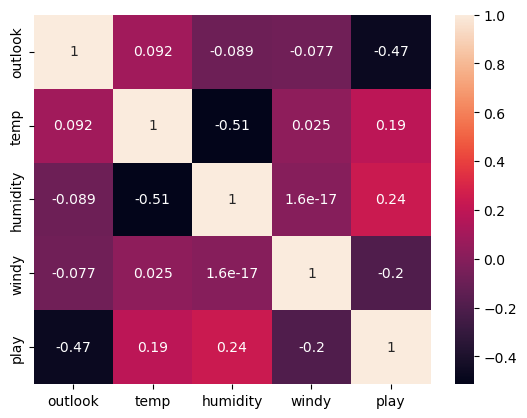

In [182]:
sns.heatmap(tennis.corr(),annot=True) # annot, If True, write the data value in each cell.

In [183]:
x=tennis[['outlook','temp','humidity','windy']] 

In [184]:
print(x)

    outlook  temp  humidity  windy
0         2     1         0      0
1         2     1         0      1
2         0     1         0      0
3         1     2         0      0
4         1     0         1      0
5         1     0         1      1
6         0     0         1      1
7         2     2         0      0
8         2     0         1      0
9         1     2         1      0
10        2     2         1      1
11        0     2         0      1
12        0     1         1      0
13        1     2         0      1


In [185]:
y=tennis.play

In [186]:
y

0     25
1     30
2     46
3     45
4     52
5     23
6     43
7     35
8     38
9     46
10    48
11    52
12    44
13    30
Name: play, dtype: int64

In [187]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1 )

In [188]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)

# Multiple Linear Regression

In [189]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [190]:
linreg.intercept_

39.45454545454545

In [191]:
linreg.coef_

array([-4.02576742,  4.3837113 ,  3.88842613, -2.62376982])

In [192]:
y_pred=linreg.predict(x_test)

In [193]:
y_pred

array([43.08040015, 38.00074102, 39.63727306])

In [194]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df)

   Actual  Predicted
3      45  43.080400
7      35  38.000741
6      43  39.637273


In [195]:
from sklearn import metrics as m 

In [196]:
m.mean_absolute_error(y_test,y_pred)

2.761022600963313

In [197]:
m.mean_squared_error(y_test,y_pred)

7.999080892236402

In [198]:
np.sqrt(m.mean_squared_error(y_test,y_pred ))

2.828264643246173

In [199]:
m.r2_score(y_test,y_pred)

0.5714778093444784

# Decision Tree Regression

In [200]:
from sklearn.tree import DecisionTreeRegressor
Dec_Tree_reg=DecisionTreeRegressor(criterion= 'poisson',max_depth=10, min_samples_split=10, random_state=5)
Dec_Tree_reg.fit(x_train,y_train)
#criterion= mse, mae, poisson and friedman_mse

DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_split=10,
                      random_state=5)

In [201]:
y_pred=Dec_Tree_reg.predict(x_test)

In [202]:
y_pred

array([36.5       , 36.5       , 47.33333333])

In [203]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df)

   Actual  Predicted
3      45  36.500000
7      35  36.500000
6      43  47.333333


In [204]:
from sklearn import metrics as m 

In [205]:
m.mean_absolute_error(y_test,y_pred)

4.777777777777779

In [206]:
m.mean_squared_error(y_test,y_pred)

31.0925925925926

In [207]:
np.sqrt(m.mean_squared_error(y_test,y_pred ))

5.576073223388714

In [208]:
m.r2_score(y_test,y_pred)

-0.6656746031746035